In [3]:
#Task_3(Customer segmentation)
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
#Load Dataset
df=pd.read_csv("Dataset.csv")

In [5]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          NaN   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
#Check For Missing Values(true=NaN,Null value)or No value are in the cell
print("Missing Values:\n",df.isnull())

Missing Values:
     customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        False   False          False    False       False   False   
1        False   False          False    False       False   False   
2        False   False          False    False       False   False   
3        False   False          False    False       False   False   
4        False   False          False    False       False   False   
..         ...     ...            ...      ...         ...     ...   
94       False   False          False    False       False   False   
95       False   False          False    False       False   False   
96       False   False          False    False       False   False   
97       False   False          False    False       False   False   
98       False   False          False    False       False   False   

    PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0          False          False            False           False  ...

In [6]:
#Total Number of Null Value in each Attribute
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       2
Partner             0
Dependents          1
tenure              1
PhoneService        3
MultipleLines       1
InternetService     4
OnlineSecurity      1
OnlineBackup        7
DeviceProtection    4
TechSupport         4
StreamingTV         2
StreamingMovies     1
Contract            3
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
#Convert 'Contract' and 'Churn' to numeric using Label Encoding
label_enc = LabelEncoder()
df['Contract'] = label_enc.fit_transform(df['Contract'])
df['Churn'] = label_enc.fit_transform(df['Churn'])  # Yes=1, No=0

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,NaN,No,No,1,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,DSL,Yes,...,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,9848-JQJTX,Male,0.0,No,No,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,2,Yes,Bank transfer (automatic),100.90,7459.05,0
95,8637-XJIVR,Female,0.0,No,No,12.0,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,0,Yes,Electronic check,78.95,927.35,1
96,9803-FTJCG,Male,0.0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,1,Yes,Credit card (automatic),66.85,4748.70,0
97,0278-YXOOG,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,NaN,No internet service,No internet service,No internet service,0,No,Mailed check,21.05,113.85,1


In [10]:
#Create Tenure & Monthly Charges Segments
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=["0-12", "13-24", "25-48", "49-72"])
df['MonthlyCharges_Group'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 100, df['MonthlyCharges'].max()],
                                     labels=["Low", "Medium", "High", "Very High"])

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,MonthlyCharges_Group
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,0,Yes,Electronic check,29.85,29.85,0,0-12,Low
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,1,No,Mailed check,56.95,1889.50,0,25-48,Medium
2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,DSL,Yes,...,No,No,0,Yes,Mailed check,53.85,108.15,1,0-12,Medium
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0,25-48,Medium
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,0,Yes,Electronic check,70.70,151.65,1,0-12,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,9848-JQJTX,Male,0.0,No,No,72.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,2,Yes,Bank transfer (automatic),100.90,7459.05,0,49-72,Very High
95,8637-XJIVR,Female,0.0,No,No,12.0,Yes,Yes,Fiber optic,Yes,...,No,No,0,Yes,Electronic check,78.95,927.35,1,0-12,High
96,9803-FTJCG,Male,0.0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,No,No,1,Yes,Credit card (automatic),66.85,4748.70,0,49-72,Medium
97,0278-YXOOG,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,No internet service,No internet service,0,No,Mailed check,21.05,113.85,1,0-12,Low


In [13]:
#Grouping and analyzing churn rate
segmentation = df.groupby(['Tenure_Group', 'MonthlyCharges_Group', 'Contract'],observed=False)['Churn'].mean().reset_index()

In [14]:
segmentation

,Tenure_Group,MonthlyCharges_Group,Contract,Churn
0,0-12,Low,0,0.500000
1,0-12,Low,1,0.000000
2,0-12,Low,2,NaN
3,0-12,Low,3,NaN
4,0-12,Medium,0,0.444444
...,...,...,...,...
59,49-72,High,3,0.000000
60,49-72,Very High,0,0.500000
61,49-72,Very High,1,0.000000
62,49-72,Very High,2,0.000000


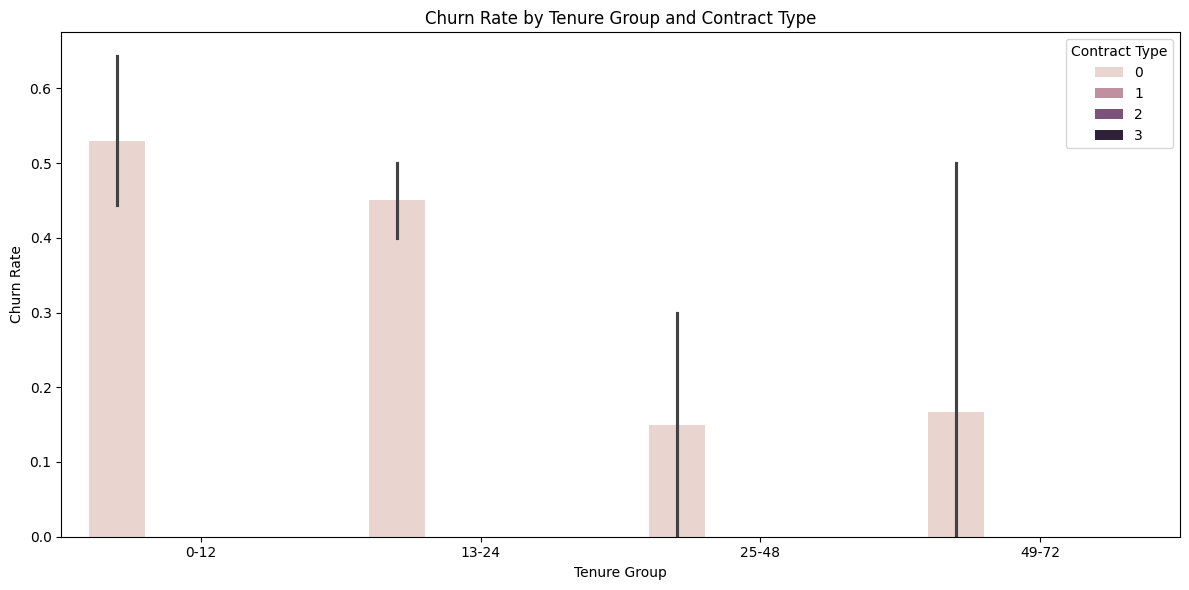

In [15]:
#plotting the churn rate by tenure group and contract type
plt.figure(figsize=(12, 6))
sns.barplot(data=segmentation, x='Tenure_Group', y='Churn', hue='Contract')
plt.title('Churn Rate by Tenure Group and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.legend(title='Contract Type')
plt.tight_layout()
plt.show()

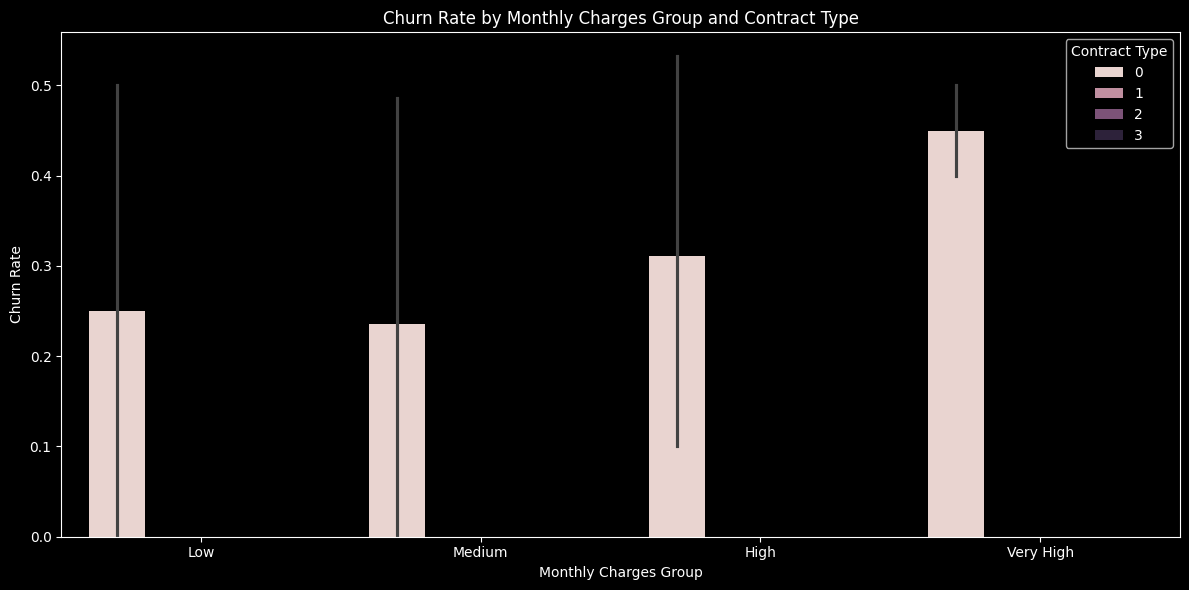

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=segmentation, x='MonthlyCharges_Group', y='Churn', hue='Contract')
plt.title('Churn Rate by Monthly Charges Group and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Monthly Charges Group')
plt.legend(title='Contract Type')
plt.tight_layout()
plt.show()